# Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

# Step 1. reading and uderstanding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
#specifying all rows/columns that need to display
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [3]:
#read the data
bike = pd.read_csv('day.csv')
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
bike.shape

(730, 16)

## Basic Undestanding and observation 

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
len(bike[bike.duplicated()])  # No duplicate found

0

In [7]:
# dropping some columns which are not required for analysis
#instant : not required for analysis
#dteday : we already have day and year columns
#casual : not a feature 
#registered : not a feature

bike=bike.drop(columns=['instant','dteday','casual','registered'])
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Observations:

- Season: we have 4 seasons 1:spring, 2:summer, 3:fall, 4:winter
- yr: 2 years of data 2018-2019
- mnth : 12 mnths of data prsent no abnormal values
- holiday: max is 1 and min is 0 - boolean values
- weekday: values are 7 i.e. 0 to 6 respect to each day in week.  

In [9]:
bike.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985


## Tranforming columns based on logics as per dictionary 

In [10]:
bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['yr'] = bike['yr'].map({0:'2018', 1:'2019'})
bike['mnth'] = bike['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                                 7:'Jul',8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov',12:'Dec'})
bike['weekday'] = bike['weekday'].map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})
bike['weathersit'] = bike['weathersit'].map({1:'Clear and Few clouds',
                                             2:'Mist and Cloudy, Mist', 
                                             3:'Light Snow and Light Rain'})

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Mon,0,"Mist and Cloudy, Mist",14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Tues,0,"Mist and Cloudy, Mist",14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Wed,1,Clear and Few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thurs,1,Clear and Few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Fri,1,Clear and Few clouds,9.305237,11.46350,43.6957,12.522300,1600


# EDA

## Univariate Analysis 

In [11]:
bike.shape

(730, 12)

In [12]:
num_col=['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']
text_col=['season','mnth','weekday','weathersit']
len(num_col+text_col)

12

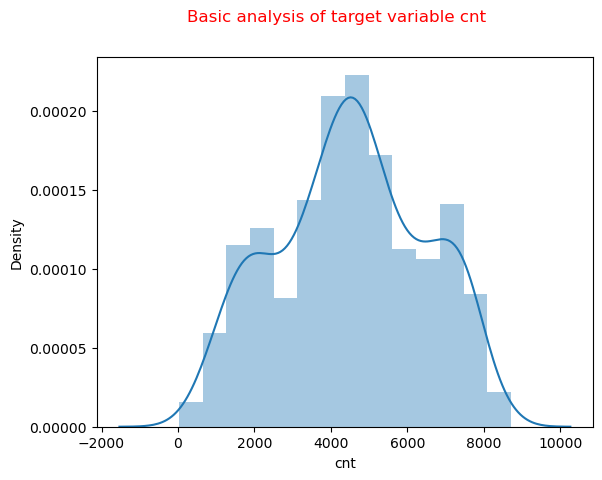

In [13]:
plt.suptitle('Basic analysis of target variable cnt', color='Red')
sns.distplot(bike['cnt'])
plt.show()

### Observations
- Evenly spread data points

### Univariate Analysis on Numeric Columns

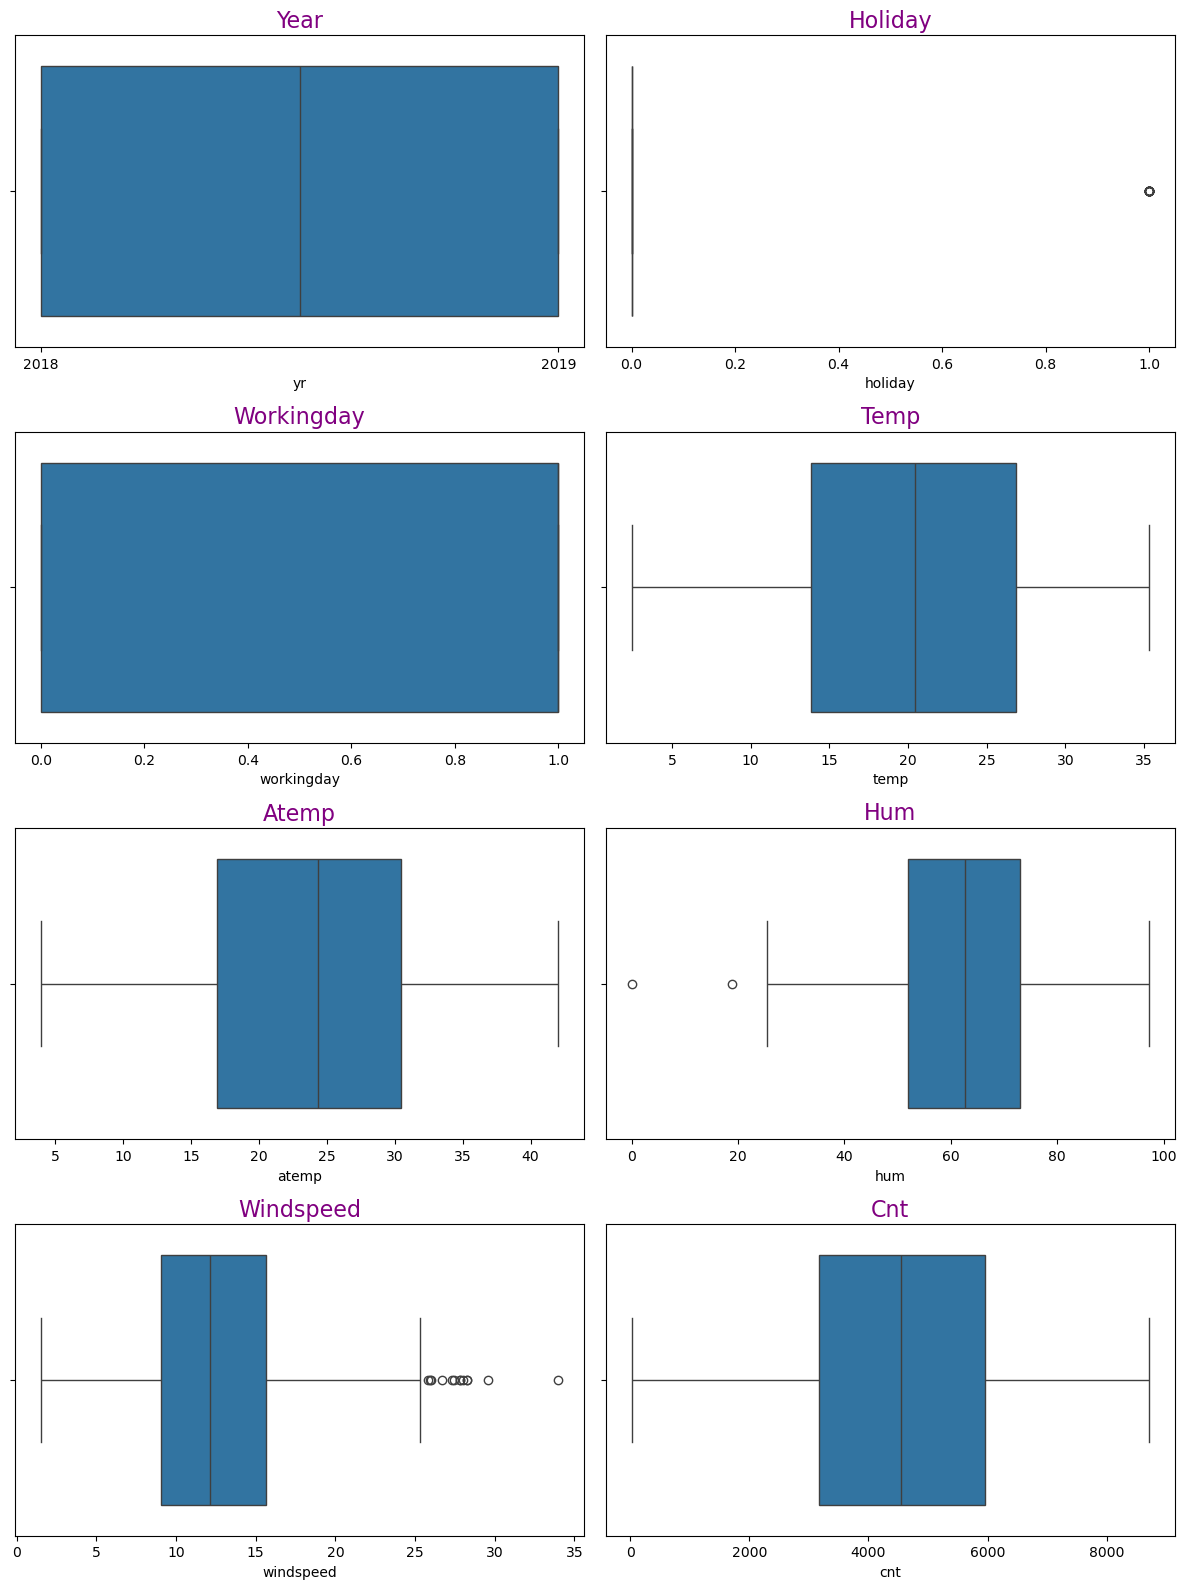

In [14]:
num_col=['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']
title=['Year','Holiday','Workingday','Temp','Atemp','Hum','Windspeed','Cnt']
plt.figure(figsize=(12, 16))
for i, col in enumerate(num_col):
    plt.subplot(4,2, i+1)
    sns.boxplot(x=bike[col])
    plt.title(title[i], color='Purple', fontsize=16 )

plt.tight_layout()
plt.show()

In [15]:
for i in num_col:
    print(f'Description of {i}:')
    print(bike[i].describe())
    print()

Description of yr:
count      730
unique       2
top       2018
freq       365
Name: yr, dtype: object

Description of holiday:
count    730.000000
mean       0.028767
std        0.167266
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64

Description of workingday:
count    730.000000
mean       0.683562
std        0.465405
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: workingday, dtype: float64

Description of temp:
count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

Description of atemp:
count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

Description of hum:
count    730.000000


### Observations
1. Year - Data evenly split between two years
2. Holiday - Few holiday points with most of the non-holiday
3. Workingday - data ditrubuted across workin and non- wrking days so much to analysis, 68% working days.
4. Temp - Temperature values spread from central around the median, mean is 20.32 and max 35.33
5. Atemp - follows same as Temp distribution, mean - 23.73, min is 3,95 and max is 42.04 degree celsius.
6. Hum - humidity shows wide range of value with some outliers, mean - 62.77%,  range (0 to 97.25%)
7. Windspeed - many outliers on higher end,  mean - 12.76
8. Cnt - varies signifivantly with few extreamw values, mean 4508, min 22 and max is 8714. 

### Univariate Analysis on Text Columns

In [16]:
text_col

['season', 'mnth', 'weekday', 'weathersit']

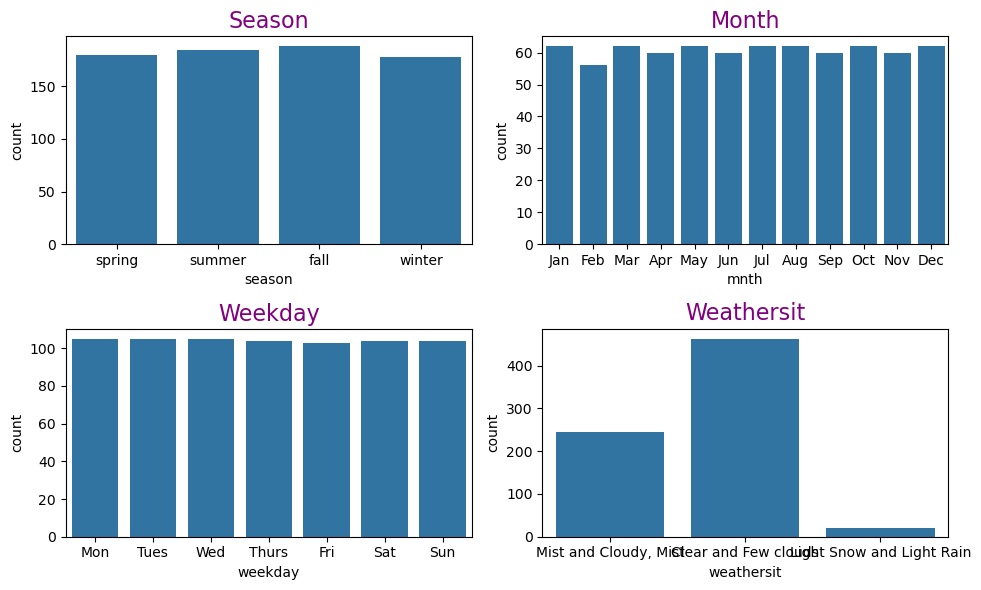

In [17]:
title=['Season', 'Month', 'Weekday', 'Weathersit']
plt.figure(figsize=(10, 6))
for i, col in enumerate(text_col):
    plt.subplot(2,2, i+1)
    sns.countplot(x=bike[col])
    plt.title(title[i], color='Purple', fontsize=16 )

plt.tight_layout()
plt.show()

### Observations
1. Season - Data is fairly evenly ditributed across all season, fall season is slightly high.
2. Monthly - Failrly ditrubuted data.
3. Week - Evenly distributed data from Monday to Sunday.
4. Weather - high Occurrence of data is clear and few clouds, after that Minst and Cloudy, Mist and Light snow and Light rain have very few occurrences compare to othere two.

## Bivariate Analysis 

### Bivariate Analysis on Numeric Columns with target variable

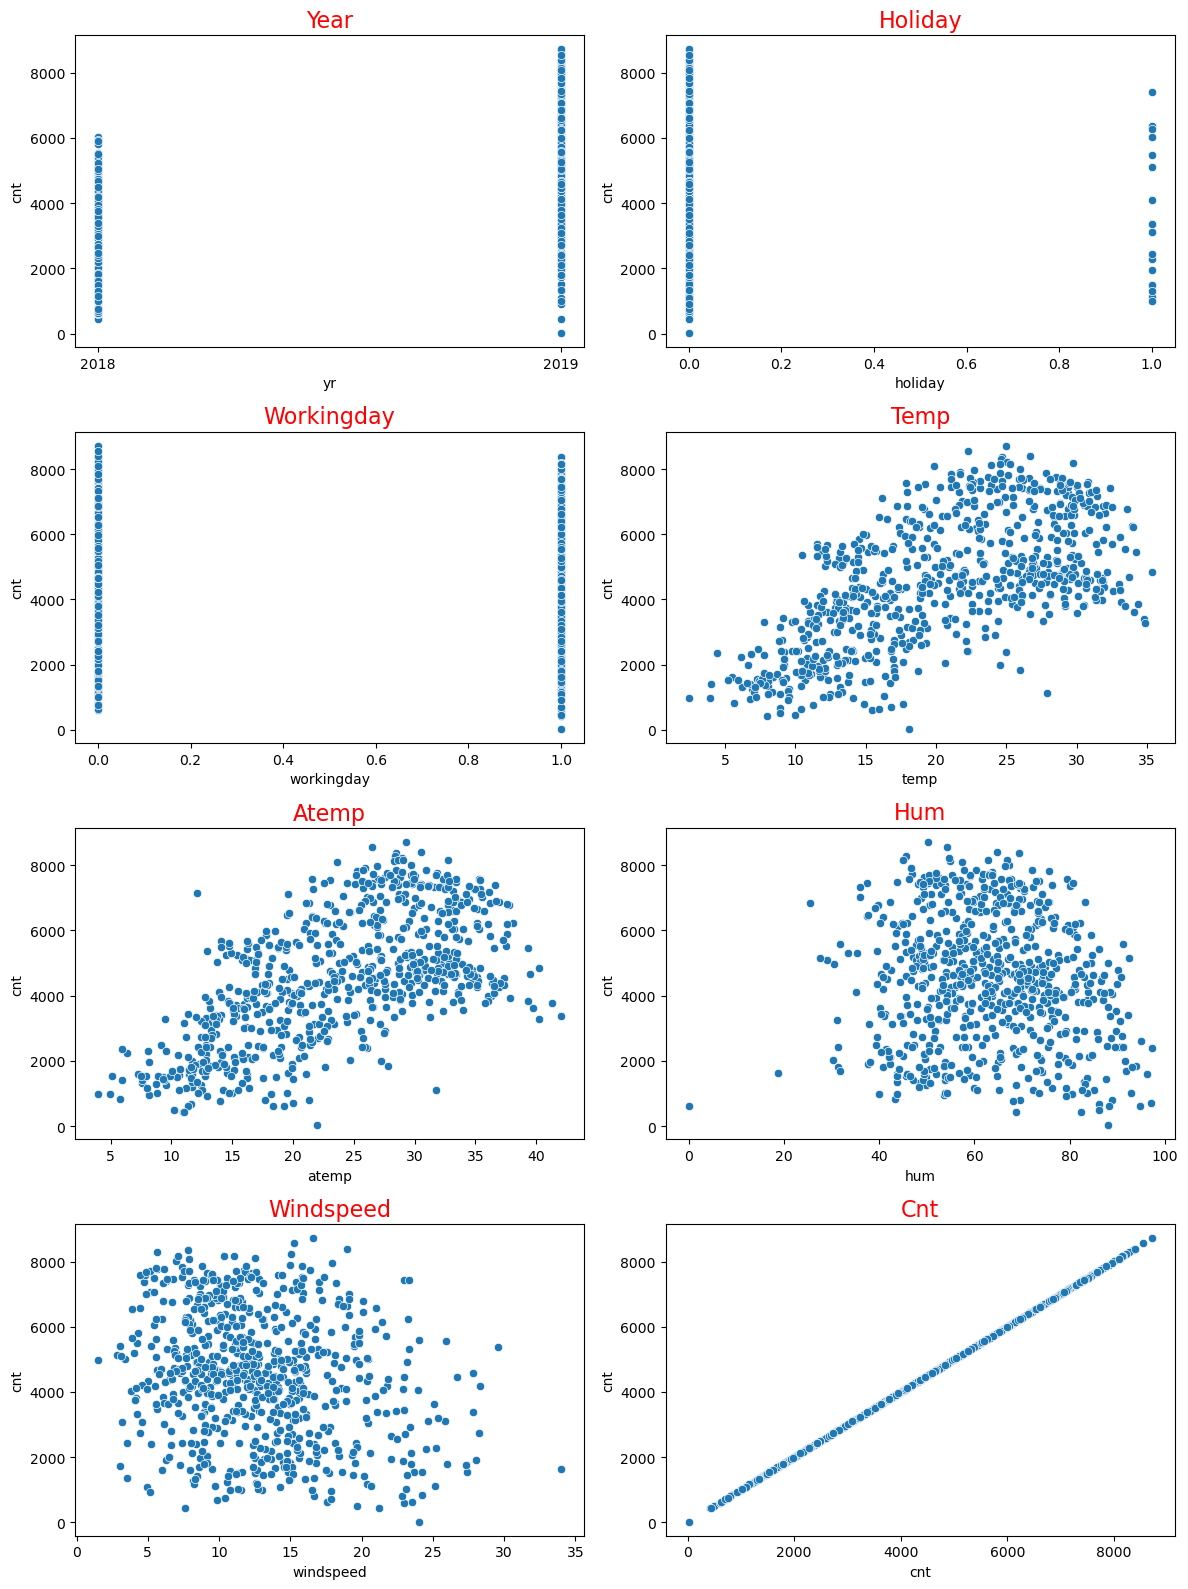

In [18]:
num_col=['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']
title=['Year','Holiday','Workingday','Temp','Atemp','Hum','Windspeed','Cnt']

plt.figure(figsize=(12,16))
for i, col in enumerate(num_col):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(x=bike[col], y=bike['cnt'])
    plt.title(title[i], color='Red', fontsize=16)
    
    
plt.tight_layout()
plt.show()



In [19]:
for i, col in enumerate(num_col):
    print(f"statistics for '{col}' with respect to cnt:")
    print(bike[['cnt',col]].describe(),'\n')

statistics for 'yr' with respect to cnt:
               cnt
count   730.000000
mean   4508.006849
std    1936.011647
min      22.000000
25%    3169.750000
50%    4548.500000
75%    5966.000000
max    8714.000000 

statistics for 'holiday' with respect to cnt:
               cnt     holiday
count   730.000000  730.000000
mean   4508.006849    0.028767
std    1936.011647    0.167266
min      22.000000    0.000000
25%    3169.750000    0.000000
50%    4548.500000    0.000000
75%    5966.000000    0.000000
max    8714.000000    1.000000 

statistics for 'workingday' with respect to cnt:
               cnt  workingday
count   730.000000  730.000000
mean   4508.006849    0.683562
std    1936.011647    0.465405
min      22.000000    0.000000
25%    3169.750000    0.000000
50%    4548.500000    1.000000
75%    5966.000000    1.000000
max    8714.000000    1.000000 

statistics for 'temp' with respect to cnt:
               cnt        temp
count   730.000000  730.000000
mean   4508.006849   20.

In [20]:
### Bivariate Analysis on Text Columns with target variable

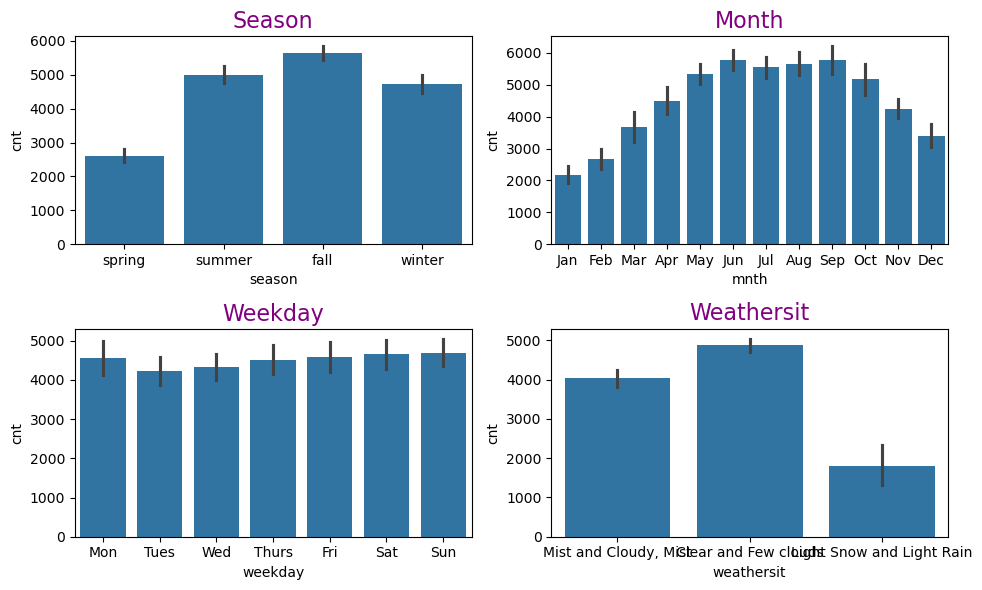

In [21]:
title=['Season', 'Month', 'Weekday', 'Weathersit']
plt.figure(figsize=(10, 6))
for i, col in enumerate(text_col):
    plt.subplot(2,2, i+1)
    sns.barplot(x=bike[col], y=bike['cnt'])
    plt.title(title[i], color='Purple', fontsize=16 )

plt.tight_layout()
plt.show()

# Step 2: Preparing the data for Modelling
- Splitting into train and test

In [22]:
bike.shape

(730, 12)

### Creating Dummy Variables

In [23]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Mon,0,"Mist and Cloudy, Mist",14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Tues,0,"Mist and Cloudy, Mist",14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Wed,1,Clear and Few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thurs,1,Clear and Few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Fri,1,Clear and Few clouds,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


In [25]:
#bike = pd.get_dummies(bike, drop_first=True)

In [26]:
dummy_list = [i for i in bike.select_dtypes(include = 'object').columns]

for i in dummy_list:
    my_d = pd.get_dummies(data= bike[i], drop_first= True)
    bike = pd.concat([bike, my_d], axis= 1).drop(labels= i, axis= 1)

In [27]:
bike.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow and Light Rain,"Mist and Cloudy, Mist"
0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
boolean_c = bike.select_dtypes(include='bool').columns
bike[boolean_c] = bike[boolean_c].astype(int)

In [29]:
bike.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow and Light Rain,"Mist and Cloudy, Mist"
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Devide the train and test data

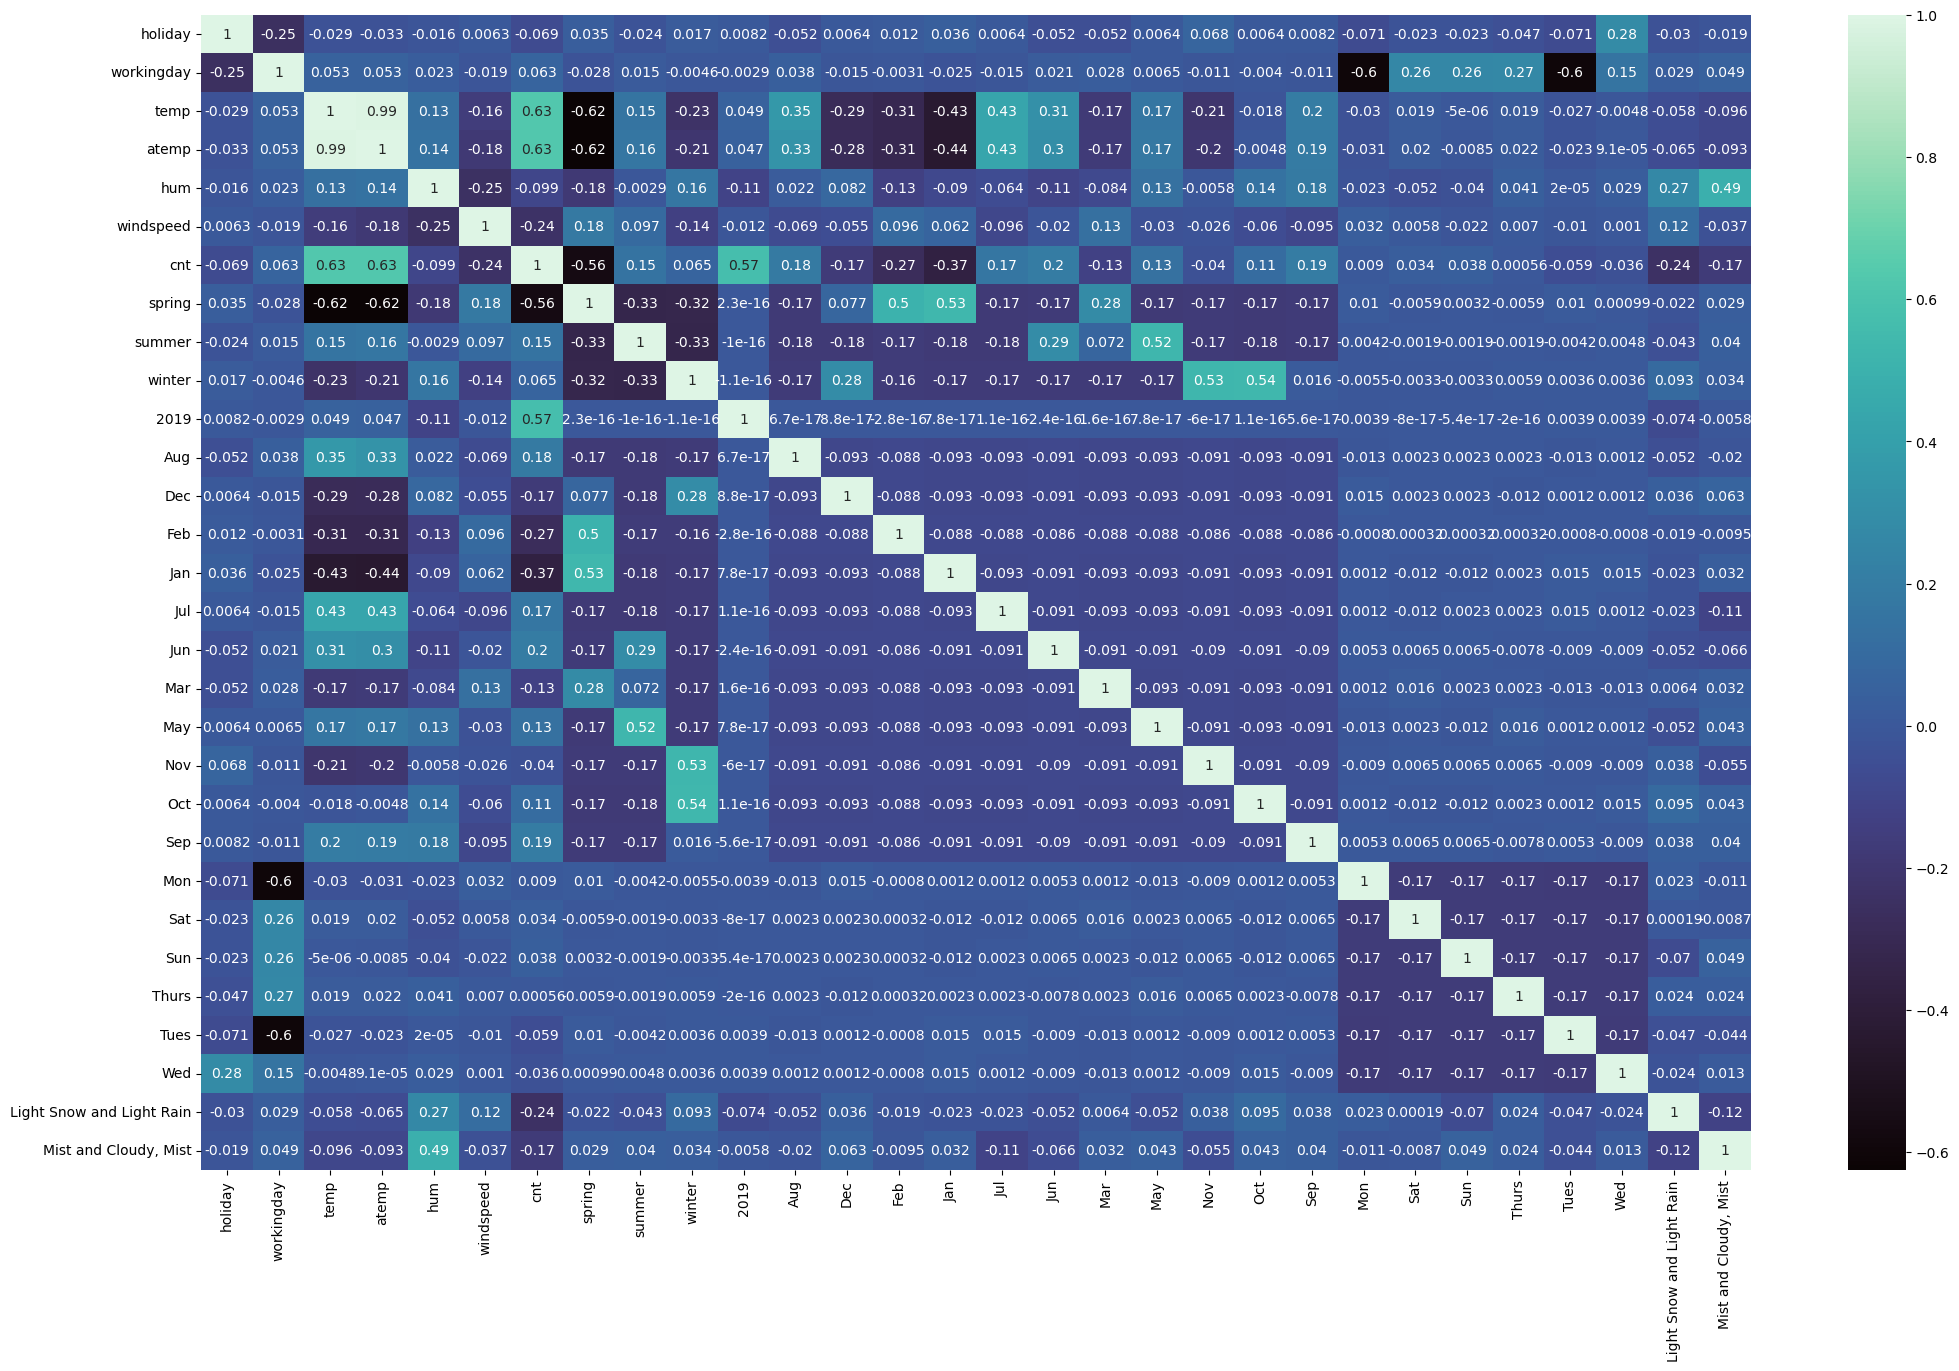

In [30]:
# creating a heatmap to show correlation after adding dummy variables.
plt.figure(figsize=(25,15))
sns.heatmap(bike.corr(),annot=True,cmap="mako")
plt.show()

In [31]:
X_train, y_test = train_test_split(bike, train_size=0.70, test_size=0.30, random_state=100)

In [32]:
X_train.shape

(510, 30)

In [33]:
y_test.shape

(219, 30)

### Rescaling the Features

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [34]:
#scaling numeric variables of traning data using MinMaxScaler
num_vars = ['temp','atemp','hum','windspeed','cnt']

#Use Normalized scaler to scale
scaler = MinMaxScaler()
scaler_list= [i for i in X_train.columns if X_train[i].nunique() > 2]

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [35]:
X_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow and Light Rain,"Mist and Cloudy, Mist"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow and Light Rain,"Mist and Cloudy, Mist"
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [37]:
X_train.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter', '2019', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'Light Snow and Light Rain', 'Mist and Cloudy, Mist'], dtype='object')

In [38]:
X_train.shape

(510, 30)

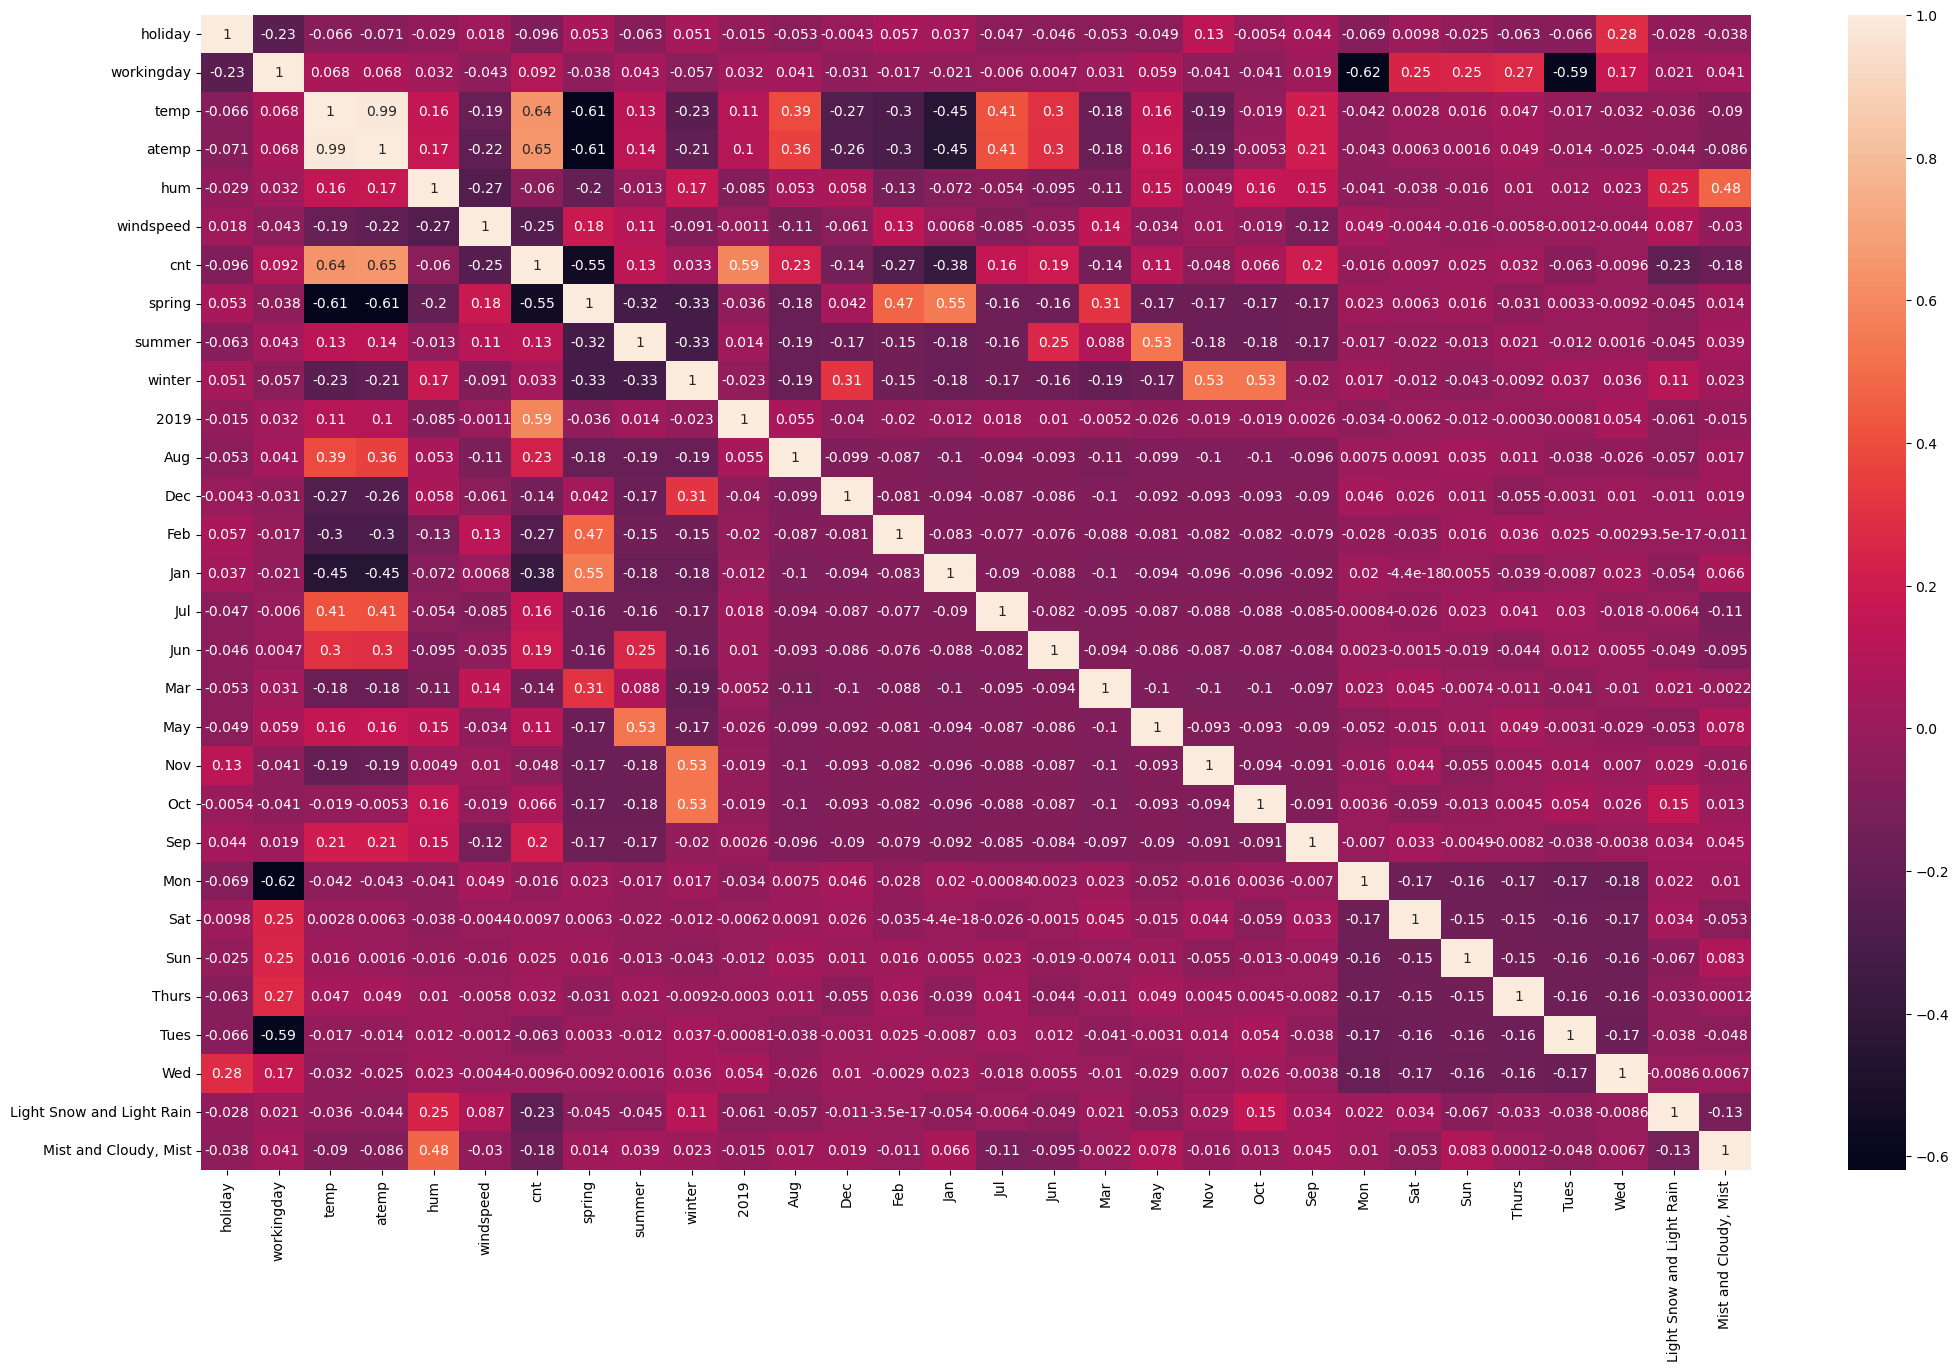

In [39]:
plt.figure(figsize = (25, 15))  #Checking if the variables are highly correlated
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [40]:
# generating x and y datasets
y_train = X_train.pop("cnt")

In [41]:
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')

X_train shape: (510, 29), y_train shape: (510,)


In [42]:
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow and Light Rain,"Mist and Cloudy, Mist"
653,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


# Step-3 : Training the Model 

## RFE

In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
#Cut down number of features to 15 using automated approach
rfe = RFE(estimator=lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [45]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', False, 11),
 ('Thurs', False, 8),
 ('Tues', True, 1),
 ('Wed', False, 9),
 ('Light Snow and Light Rain', True, 1),
 ('Mist and Cloudy, Mist', True, 1)]

In [46]:
# using abive data extract 15 columns

In [47]:
temp_rfe = pd.DataFrame()

In [48]:
temp_rfe['Col'] = X_train.columns

In [49]:
temp_rfe['RFE_Support'] = rfe.support_

In [50]:
temp_rfe = temp_rfe[temp_rfe['RFE_Support']== True]

In [51]:
temp_rfe

,Col,RFE_Support
0,holiday,True
1,workingday,True
2,temp,True
4,hum,True
5,windspeed,True
6,spring,True
7,summer,True
8,winter,True
9,2019,True
14,Jul,True


In [52]:
my_cols= [i for i in temp_rfe['Col']]
X_train[my_cols].head()

,holiday,workingday,temp,hum,windspeed,spring,summer,winter,2019,Jul,Sep,Mon,Tues,Light Snow and Light Rain,"Mist and Cloudy, Mist"
653,0,1,0.509887,0.575354,0.300794,0,0,1,1,0,0,0,0,0,0
576,0,1,0.815169,0.725633,0.264686,0,0,0,1,1,0,0,0,0,0
426,0,0,0.442393,0.640189,0.255342,1,0,0,1,0,0,1,0,0,1
728,0,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,1,0,0
482,0,0,0.395666,0.504508,0.188475,0,1,0,1,0,0,1,0,0,1


In [53]:
# creating a function to calculate vif:
def calculate_vif(X_train):
    vif = pd.DataFrame()
    vif['features'] = X_train.columns
    vif['Vif']  = [round(variance_inflation_factor(X_train.values, i),2) for i in range(X_train.shape[1])]
    vif = vif.sort_values(by="Vif",ascending=False)
    return vif

In [54]:
# creting reg model:
#def reg_model(y_datframe, X_dataframe):
 #   X_dataframe= sm.add_constant(X_dataframe)
  #  lm= lm.OLS(y_datframe, X_dataframe).fit()
   # print(lm.summary())

In [55]:
#initiating data frame
X_train_1= X_train[my_cols]

## Model Building

In [56]:
# generating model-1

X_train_sm = sm.add_constant(X_train_1)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.13e-191
Time:                        21:13:12   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1989      0.028      7.181      0.000       0.144       0.253
holiday                      -0.0190      0.021     -0.892      0.373      -0.061       0.023
workingday                    0.0837      0.010      8.672      0.000       0.065       0.103
temp                          0.5278      0.033     15.897      0.000       0.463       0.593
hum                          -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed                    -0.1806      0.025     -7.110      0.000      -0.231      -0.131
spring                       -0.0554      0.021     -2.694      0.007      -0.096      -0.015
summer                        0.0526      0.015      3.553      0.000       0.024       0.082
winter                        0.1003      0.017      5.890      0.000       0.067       0.134
2019                          0.2297      0.008     28.660      0.000       0.214       0.245
Jul                          -0.0549      0.018     -3.035      0.003      -0.090      -0.019
Sep                           0.0818      0.016      4.956      0.000       0.049       0.114
Mon                           0.0937      0.012      8.045      0.000       0.071       0.117
Tues                          0.0405      0.012      3.304      0.001       0.016       0.065
Light Snow and Light Rain    -0.2463      0.026     -9.449      0.000      -0.298      -0.195
Mist and Cloudy, Mist        -0.0578      0.010     -5.559      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                     1.13e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
calculate_vif(X_train_1)

,features,Vif
1,workingday,50.69
11,Mon,12.20
12,Tues,11.79
5,spring,5.02
2,temp,3.62
7,winter,3.49
0,holiday,2.91
6,summer,2.61
3,hum,1.91
14,"Mist and Cloudy, Mist",1.57


In [58]:
# Dropping the variable holiday is insignificant as it has high p-value
X_train_1.drop("holiday",inplace=True,axis='columns')

In [59]:
# generating model-2

X_train_sm = sm.add_constant(X_train_1)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.13e-191
Time:                        21:13:12   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1799      0.042      4.276      0.000       0.097       0.263
workingday                    0.1027      0.025      4.047      0.000       0.053       0.152
temp                          0.5278      0.033     15.897      0.000       0.463       0.593
hum                          -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed                    -0.1806      0.025     -7.110      0.000      -0.231      -0.131
spring                       -0.0554      0.021     -2.694      0.007      -0.096      -0.015
summer                        0.0526      0.015      3.553      0.000       0.024       0.082
winter                        0.1003      0.017      5.890      0.000       0.067       0.134
2019                          0.2297      0.008     28.660      0.000       0.214       0.245
Jul                          -0.0549      0.018     -3.035      0.003      -0.090      -0.019
Sep                           0.0818      0.016      4.956      0.000       0.049       0.114
Mon                           0.1126      0.027      4.202      0.000       0.060       0.165
Tues                          0.0594      0.027      2.206      0.028       0.006       0.112
Light Snow and Light Rain    -0.2463      0.026     -9.449      0.000      -0.298      -0.195
Mist and Cloudy, Mist        -0.0578      0.010     -5.559      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
calculate_vif(X_train_1)

,features,Vif
2,hum,32.14
1,temp,18.98
0,workingday,18.41
10,Mon,4.91
3,windspeed,4.90
4,spring,4.80
11,Tues,4.76
6,winter,3.71
5,summer,3.03
13,"Mist and Cloudy, Mist",2.31


In [61]:
# Dropping the variable Tues is insignificant as it has high p-value
X_train_1.drop("Tues",inplace=True,axis='columns')

In [62]:
# generating model-3

X_train_sm = sm.add_constant(X_train_1)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          8.51e-192
Time:                        21:13:12   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2298      0.036      6.451      0.000       0.160       0.300
workingday                    0.0521      0.011      4.790      0.000       0.031       0.073
temp                          0.5279      0.033     15.838      0.000       0.462       0.593
hum                          -0.1578      0.037     -4.209      0.000      -0.232      -0.084
windspeed                    -0.1812      0.025     -7.106      0.000      -0.231      -0.131
spring                       -0.0565      0.021     -2.736      0.006      -0.097      -0.016
summer                        0.0530      0.015      3.562      0.000       0.024       0.082
winter                        0.0993      0.017      5.813      0.000       0.066       0.133
2019                          0.2300      0.008     28.580      0.000       0.214       0.246
Jul                          -0.0537      0.018     -2.962      0.003      -0.089      -0.018
Sep                           0.0797      0.017      4.819      0.000       0.047       0.112
Mon                           0.0622      0.014      4.438      0.000       0.035       0.090
Light Snow and Light Rain    -0.2455      0.026     -9.383      0.000      -0.297      -0.194
Mist and Cloudy, Mist        -0.0576      0.010     -5.512      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       71.749   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.211
Skew:                          -0.707   Prob(JB):                     3.67e-41
Kurtosis:                       5.601   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
calculate_vif(X_train_1)

,features,Vif
2,hum,28.41
1,temp,16.87
0,workingday,4.71
3,windspeed,4.70
4,spring,4.18
6,winter,3.40
5,summer,2.83
12,"Mist and Cloudy, Mist",2.28
7,2019,2.08
10,Mon,1.84


In [64]:
# Dropping the variable hum is insignificant as it has high VIF value
X_train_1.drop("hum",inplace=True,axis='columns')

In [65]:
# generating model-4

X_train_sm = sm.add_constant(X_train_1)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          3.28e-189
Time:                        21:13:12   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1493      0.031      4.886      0.000       0.089       0.209
workingday                    0.0547      0.011      4.962      0.000       0.033       0.076
temp                          0.4925      0.033     15.020      0.000       0.428       0.557
windspeed                    -0.1500      0.025     -6.047      0.000      -0.199      -0.101
spring                       -0.0662      0.021     -3.174      0.002      -0.107      -0.025
summer                        0.0469      0.015      3.117      0.002       0.017       0.076
winter                        0.0851      0.017      4.997      0.000       0.052       0.119
2019                          0.2338      0.008     28.766      0.000       0.218       0.250
Jul                          -0.0489      0.018     -2.657      0.008      -0.085      -0.013
Sep                           0.0738      0.017      4.408      0.000       0.041       0.107
Mon                           0.0666      0.014      4.688      0.000       0.039       0.094
Light Snow and Light Rain    -0.2892      0.024    -11.845      0.000      -0.337      -0.241
Mist and Cloudy, Mist        -0.0830      0.009     -9.581      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       72.688   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.799
Skew:                          -0.721   Prob(JB):                     4.51e-41
Kurtosis:                       5.581   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
calculate_vif(X_train_1)

,features,Vif
1,temp,6.73
0,workingday,4.65
2,windspeed,4.64
3,spring,2.38
4,summer,2.31
6,2019,2.07
5,winter,1.92
9,Mon,1.83
7,Jul,1.58
11,"Mist and Cloudy, Mist",1.56


In [67]:
# Dropping the variable Jul is insignificant as it has high p-value
X_train_1.drop("Jul",inplace=True,axis='columns')

In [68]:
# generating model-5

X_train_sm = sm.add_constant(X_train_1)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          6.86e-189
Time:                        21:13:12   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1405      0.031      4.599      0.000       0.081       0.201
workingday                    0.0557      0.011      5.021      0.000       0.034       0.077
temp                          0.4800      0.033     14.702      0.000       0.416       0.544
windspeed                    -0.1501      0.025     -6.014      0.000      -0.199      -0.101
spring                       -0.0551      0.021     -2.680      0.008      -0.096      -0.015
summer                        0.0615      0.014      4.370      0.000       0.034       0.089
winter                        0.0972      0.017      5.885      0.000       0.065       0.130
2019                          0.2343      0.008     28.664      0.000       0.218       0.250
Sep                           0.0872      0.016      5.421      0.000       0.056       0.119
Mon                           0.0669      0.014      4.682      0.000       0.039       0.095
Light Snow and Light Rain    -0.2902      0.025    -11.813      0.000      -0.338      -0.242
Mist and Cloudy, Mist        -0.0817      0.009     -9.391      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       76.386   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.041
Skew:                          -0.765   Prob(JB):                     5.41e-42
Kurtosis:                       5.569   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
calculate_vif(X_train_1)

,features,Vif
1,temp,5.48
0,workingday,4.65
2,windspeed,4.63
3,spring,2.30
6,2019,2.07
4,summer,1.99
8,Mon,1.83
5,winter,1.77
10,"Mist and Cloudy, Mist",1.56
7,Sep,1.23


In [70]:
# Dropping the variable spring is insignificant as it has high p-value
X_train_1.drop("spring",inplace=True,axis='columns')

In [71]:
# generating model-6

X_train_sm = sm.add_constant(X_train_1)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.47e-188
Time:                        21:13:12   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0753      0.019      4.051      0.000       0.039       0.112
workingday                    0.0563      0.011      5.048      0.000       0.034       0.078
temp                          0.5499      0.020     27.885      0.000       0.511       0.589
windspeed                    -0.1552      0.025     -6.201      0.000      -0.204      -0.106
summer                        0.0874      0.010      8.481      0.000       0.067       0.108
winter                        0.1318      0.010     12.760      0.000       0.112       0.152
2019                          0.2331      0.008     28.382      0.000       0.217       0.249
Sep                           0.0972      0.016      6.181      0.000       0.066       0.128
Mon                           0.0677      0.014      4.710      0.000       0.039       0.096
Light Snow and Light Rain    -0.2880      0.025    -11.659      0.000      -0.337      -0.239
Mist and Cloudy, Mist        -0.0813      0.009     -9.292      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       68.959   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.793
Skew:                          -0.731   Prob(JB):                     4.02e-34
Kurtosis:                       5.258   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
calculate_vif(X_train_1)

,features,Vif
1,temp,4.76
0,workingday,4.04
2,windspeed,3.43
5,2019,2.02
7,Mon,1.69
3,summer,1.57
9,"Mist and Cloudy, Mist",1.53
4,winter,1.40
6,Sep,1.20
8,Light Snow and Light Rain,1.08


### Observation:
- All VIF and P value are controlled so this Model ins valid

## Residual Analysis

In [73]:
lm= sm.OLS(y_train, X_train_1).fit()
ytrain_pred= lm.predict(X_train_1)
Residual= y_train - ytrain_pred

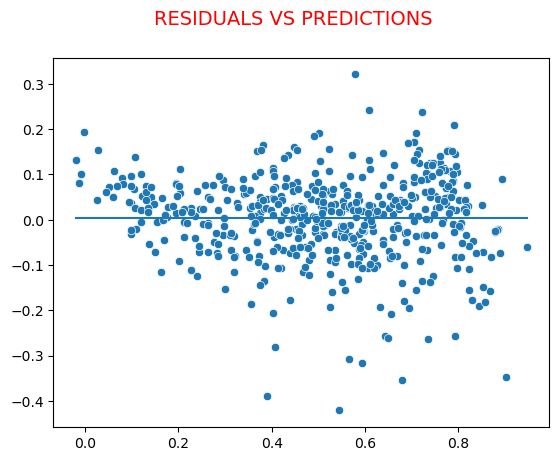

In [74]:
sns.scatterplot(y= Residual.values, x= ytrain_pred.values, palette= 'Purple ')
sns.lineplot(y= Residual.mean(), x= ytrain_pred.values, palette= 'Purple')
plt.suptitle('Residuals vs predictions'.upper(), fontsize= 14, color='Red')

plt.show()

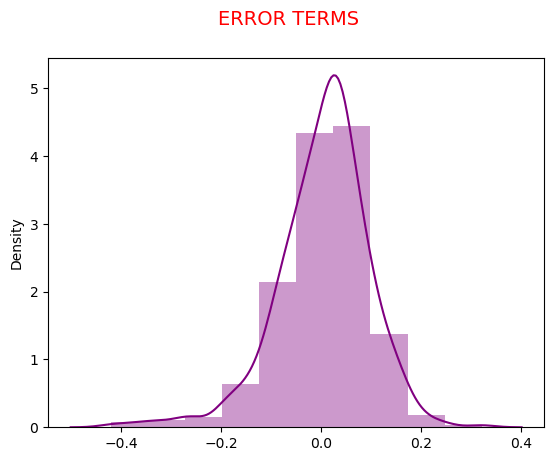

In [75]:
sns.distplot(Residual, bins=10, color='Purple')
plt.suptitle('Error Terms'.upper(), fontsize= 14, color='Red')

plt.show()

### Observations:
- Mean od Residuals is extremely close to 0 
- Error term is near to evenly distributed

## Making Prediction

### Apply Scalling on Test Dataset

In [76]:
y_test.sample(5)

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow and Light Rain,"Mist and Cloudy, Mist"
75,0,1,17.015000,20.51665,60.2917,14.041793,2744,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
469,0,0,24.873347,28.69375,50.7917,15.083643,7132,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
341,0,1,10.899153,12.84690,58.0000,16.083886,3322,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
299,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
272,0,1,23.130847,27.24145,64.7500,13.833825,5202,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [77]:
y_test[scaler_list]= scaler.transform(y_test[scaler_list])

In [78]:
y_test.sample(5)

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow and Light Rain,"Mist and Cloudy, Mist"
396,0,1,0.510926,0.508605,0.523401,0.315511,0.524275,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54,0,1,0.294718,0.275813,0.718651,0.447571,0.205361,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
58,0,1,0.433803,0.421419,0.903080,0.531822,0.163829,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
268,0,1,0.735215,0.669408,0.874194,0.147038,0.530143,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
311,0,1,0.435124,0.437339,0.743667,0.057471,0.481247,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [79]:
y_test.shape

(219, 30)

In [80]:
# partitioning data on X_test and Y_test

In [81]:
y_test1 = y_test.pop('cnt')
X_test1 = y_test

In [82]:
X_test1.head()

,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow and Light Rain,"Mist and Cloudy, Mist"
184,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [83]:
y_test1.shape

(219,)

In [84]:
X_test1.shape

(219, 29)

### Making Actual predictions

In [85]:
X_test_new = X_test1[X_train_1.columns]


In [86]:
y_test_pred = lm.predict(X_test_new)

In [87]:
r2 = r2_score(y_test1,y_test_pred)

## Evaluating the Predictions

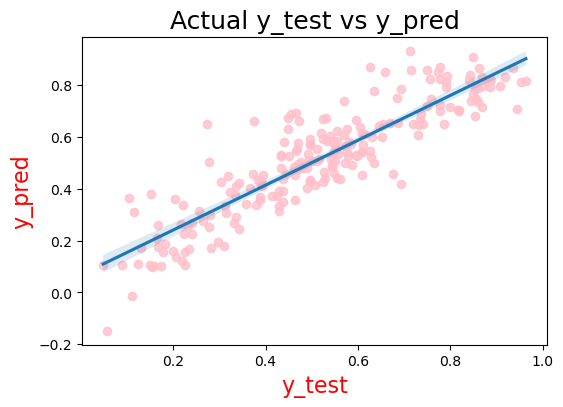

In [88]:
fig= plt.figure(figsize= (6,4))

sns.regplot(x=(y_test1),y=(y_test_pred),fit_reg=True, scatter_kws= {'color': 'pink'})
plt.title('Actual y_test vs y_pred', fontsize=18)
plt.xlabel('y_test', fontsize=16, color='Red')
plt.ylabel('y_pred', fontsize=16, color='Red')
plt.show()

### Observation:

- y_pred and y_test values show a strong visual similarity, indicating a good fit.

## Assessing the Model Quality 

In [89]:
# calculating the r2 score for both training dataset and testing dataset
print("R2 score of test data Prediction :", round(r2_score(y_pred= y_test_pred, y_true= y_test1), 5))
print("R2 score of train data Prediction :", round(r2_score(y_pred= ytrain_pred, y_true= y_train), 5))

print("Absolute difference between test and train data  is :",
      abs(round(r2_score(y_pred= y_test_pred, y_true= y_test1) - 
                (r2_score(y_pred= ytrain_pred, y_true= y_train)), 5)))

R2 score of test data Prediction : 0.79327
R2 score of train data Prediction : 0.83038
Absolute difference between test and train data  is : 0.03711


#### Since variabtion between train data and test data prediction r2_score is les that 5%, model is proven to be dependable enough to be generalized.

## Equation for Prediction

In [90]:
# checking the mean squared error for both training and testing dataset.
print('Train mean squared error: ',mean_squared_error(y_true=y_train,y_pred=ytrain_pred))
print('Test mean squared error: ',mean_squared_error(y_true=y_test1,y_pred=y_test_pred))

Train mean squared error:  0.008539311014641117
Test mean squared error:  0.00981897732363968


In [91]:
# Calculating Adjusted-R^2 value for the test dataset

Test_adjusted_r2 = round(1-(1-r2)*(X_test1.shape[0]-1)/(X_test1.shape[0]-X_test1.shape[1]-1),4)
print('Test Adjusted r2: ',Test_adjusted_r2)

Test Adjusted r2:  0.7615


In [92]:
# final model params
model = sm.OLS(y_test_pred, X_test_new)
results = model.fit()
params = results.params
rounded_paramns = np.round(params, 4)

print(rounded_paramns)


workingday                   0.0768
temp                         0.6006
windspeed                   -0.0988
summer                       0.0902
winter                       0.1467
2019                         0.2382
Sep                          0.0969
Mon                          0.0883
Light Snow and Light Rain   -0.2896
Mist and Cloudy, Mist       -0.0744
dtype: float64


## Final Equation

```
Demand = workingday*0.0768 + temp*0.6006 + windspeed*(-0.0988) + summer*(0.0902) + winter*(0.1467) 
    + 2019*0.2382 + Sep*0.0969 + Mon*0.0883 + Light Snow and Light Rain*(-0.2896) 
    + Mist and Cloudy, Mist*(-0.0744) 
```

## Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.83038
    - Test dataset R^2           : 0.79327
    - Train dataset Adjusted R^2 : 0.832  
    - Test dataset Adjusted R^2  : 0.7615

# Bussiness Recommendation:

- Bike demand increases so focus on marketing efforts on favorable seasons like summer and winter.
- Bike demand decrease in some weather conditions like light snow and light rain so cutomer needs little encouragement to purchase bike.
- The data indicate that demand was higher in 2019 compared to 2018 so they can use strategies that worked in 2019 and replicate those.